## Домашняя работа #3.

Отправлять ссылку через форму нужно только один раз. Исправления вносятся в тот же ноутбук до хард-дедлайна и помечаются комментариями в коде и комментариями к соотвествующим ячейкам.

Материалы к домашке доступны по ссылке:
https://drive.google.com/drive/folders/1dNoAOMcrRyuf_3vS1LTPpdyrqYxgvPOy?usp=sharing



Большая домашка с увеличенным баллом и временем до дедлайна.
* Морфлогия.
* Фильтры габора.
* Цветовые гистрограммы.
* Гистограммы градиентов.

МОАД5 (ИТМО6)

**Soft deadline: 12.04.2023 (05.04.2023) 03:00:00 +0003 GMT**

**Hard deadline: 19.04.2023 (12.04.2023) 03:00:00 +0003 GMT**

In [ ]:
# ПРИМОНТИРУЙТЕ ДИСК К НОУТБУКУ
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
# ИЗМЕНИТЕ ЭТОТ ПУТЬ НА ТОТ, КУДА ВЫ ПОЛОЖИЛИ МАТЕРИАЛЫ КУРСА
sources_path = Path("/content/drive/MyDrive/3img/homework3-materials")

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('default')

def pyplot(func):
    def make_pyplot_context(*args, **kwargs):
        plt.figure(figsize=kwargs.get('size', (10, 5)))
        ax = plt.axes([0,0,1,1], frameon=False)
        ax.set_axis_off()
        return func(*args, **kwargs)
    return make_pyplot_context

@pyplot
def show_bgr(img, size=(10, 5)):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

@pyplot
def show_gray(img, size=(10, 5)):
    plt.imshow(img, cmap='gray')

def mse(img1, img2):
    return ((img1.astype(int) - img2.astype(int)) ** 2).mean()



# МОРФОЛОГИЯ

**1. (5 баллов)** Выделите в изображении $table.jpg$ границы таблицы с использованием морфологических операций. Результатом обработки должно бытьn изображение, в котором удален весь текст и оставлены только границы таблицы.

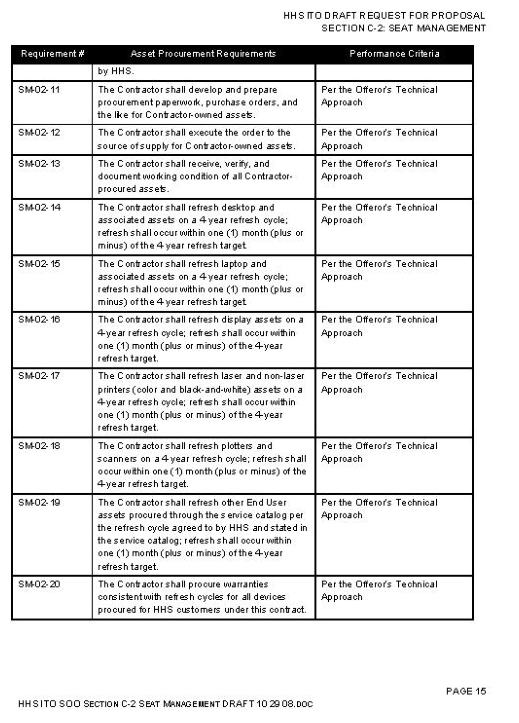

In [ ]:
table = cv2.imread(str(sources_path / "table.jpg"), 0)
show_gray(table, size=(5, 10))

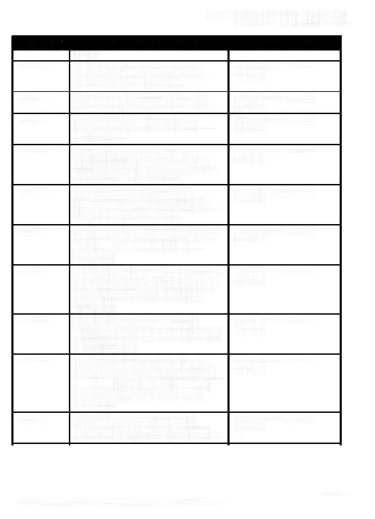

In [ ]:
st_el = np.ones((2,2)).astype('uint8')
#table_without_header = cv2.erode(table, st_el)
#table_without_black_text = cv2.dilate(table, st_el, iterations=1)

without_white_letters = cv2.morphologyEx(table, cv2.MORPH_OPEN, st_el)

st_el_v = np.ones((20, 1)).astype('uint8')
without_vert1 = cv2.morphologyEx(without_white_letters, cv2.MORPH_CLOSE, st_el_v)

without_vert2 = cv2.erode(without_vert1, st_el)

st_el_h = np.ones((1, 20)).astype('uint8')
without_hor = cv2.morphologyEx(without_white_letters, cv2.MORPH_CLOSE, st_el_h)

inters = cv2.bitwise_and(without_vert2, without_hor)

#table_res = cv2.dilate(inters, st_el)
table_res = inters
show_gray(table_res)

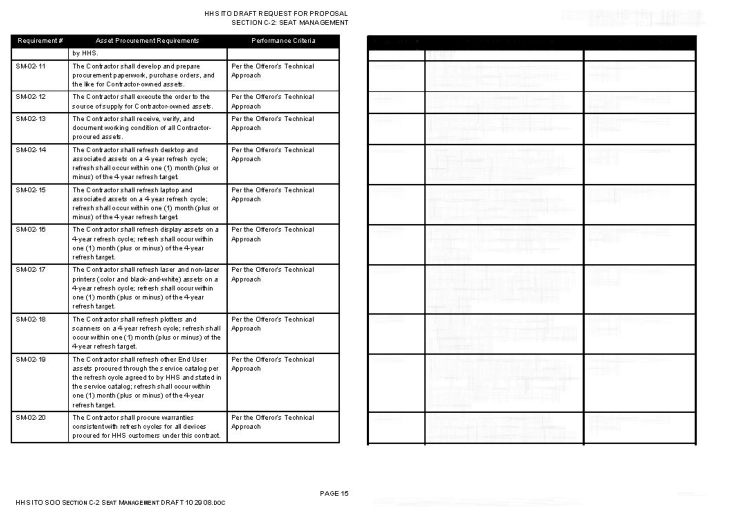

In [ ]:
x = np.hstack([table, table_res])
show_gray(x)

**2. (5 баллов)** Для изображения $circles.jpg$ реализуйте морфологический алгоритм для построения трех изображений, которые бы содержали соответственно:

* только частицы, касающиеся краев изображения,

* только группы перекрывающихся частиц,

* только одиночные круглые частицы.

Посчитайте число частиц и групп на каждом изображении. Раскрастье отдельные компоненты с помощью функции.

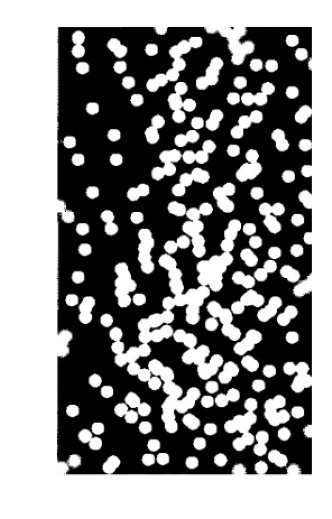

In [ ]:
circles = cv2.imread(str(sources_path / "circles.png"), 0)
show_gray(circles)

<class 'numpy.uint8'>


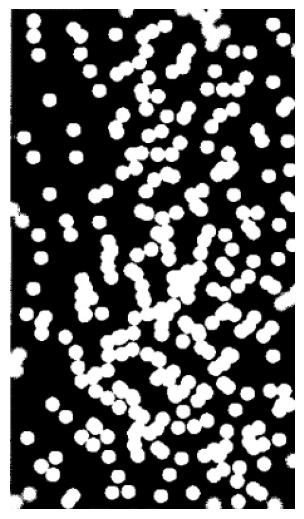

In [ ]:
_, thresh = cv2.threshold(circles, 50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnt_max = max(contours, key=cv2.contourArea)

x, y, w, h = cv2.boundingRect(cnt_max)

cropp= circles[y:y+h, x:x+w]

show_gray(cropp)
print(type(cropp[0][0]))

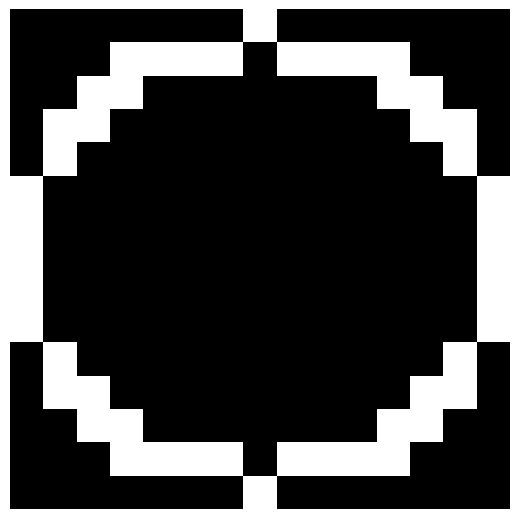

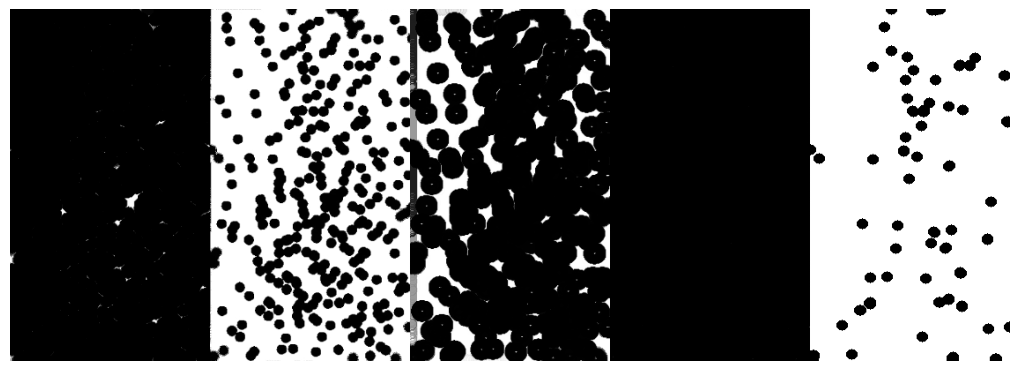

In [ ]:
x = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))
w = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
q1 = cv2.erode(cropp,x)
q21 = 255 - cropp
pad = (w.shape[0] - x.shape[0]) // 2
q22 = w - np.pad(x, ((pad, pad), (pad, pad)))
show_gray(q22)
q2 = cv2.erode(q21,q22)
q = cv2.bitwise_and(q1,q2)
q_f = cv2.dilate(q, x)
_, q_f = cv2.threshold(q_f, 0, 255, cv2.THRESH_BINARY_INV)
show_gray(np.hstack([q1,q21,q2,q,q_f]))

ни один способ норм не работает(  😐

In [ ]:
# erosion = cv2.erode(cropp,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 1)
# b = cropp - erosion
# show_gray(b)
# type(b[0][0])

In [ ]:
# full_cirles_img = np.zeros_like(b, dtype=np.float64)

# full_cirles = cv2.HoughCircles(b, cv2.HOUGH_GRADIENT,
#                                dp=5,
#                                minDist=8,
#                                param1=10,
#                                param2=10,
#                                minRadius=5,
#                                maxRadius=6)
# full_cirles = full_cirles.astype(np.float64)[0]


# for x,y,r in full_cirles:
#   cv2.circle(full_cirles_img, (int(x), int(y)), int(r), (255, 255, 255), 1)

# full_cirles_img = full_cirles_img.astype(np.uint8)
# show_gray(np.hstack([b, full_cirles_img]))

In [ ]:
# full_cirles_img = np.zeros_like(cropp, dtype=np.int32)

# single_area = 500
# overlapping = 0

# cnts = cv2.findContours(cropp, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# #print(type(cnts[0][0][0][0]))
# for c in cnts:
#     area = cv2.contourArea(c)
#     blob_area = area // single_area
#     if blob_area <= 1:
#         overlapping += blob_area
#         cv2.drawContours(full_cirles_img, [c], -1, (255,255,255), 1)

# full_cirles_img = full_cirles_img.astype(np.uint8)
# show_gray(full_cirles_img)

**3. (5 баллов)** **Watershed**

* Возьмите изображения: *coins_1.jpg*, *coins_noize_1.jpg*
* Примените к ним алгоритм водораздела, чтобы посчитать монетки
* отсоритруйте монетки по размеру и у каждой моентки в центре впишите порядковое число

В сниппете кода содержится подсказка о том, какие функции стоит поприменять.

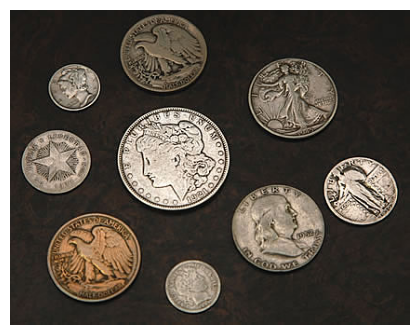

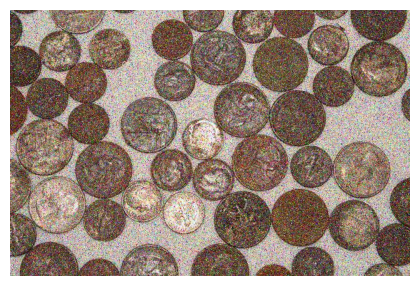

In [ ]:
from skimage.feature import peak_local_max
#from skimage.morphology import watershed
from skimage.segmentation import watershed
import scipy
from scipy.ndimage import distance_transform_edt
from scipy.ndimage import label
from cv2 import pyrMeanShiftFiltering
from google.colab.patches import cv2_imshow

from scipy import ndimage as ndi
from skimage.filters import sobel
from skimage.color import label2rgb
from skimage.measure import regionprops

coins_1 = cv2.imread(str(sources_path / "coins_1.jpg"))
show_bgr(coins_1, size=(4, 5))
coins_2 = cv2.imread(str(sources_path / "coins_noize_1.jpg"))
show_bgr(coins_2, size=(4, 5))

In [ ]:
gray_c1 = cv2.cvtColor(coins_1, cv2.COLOR_BGR2GRAY)

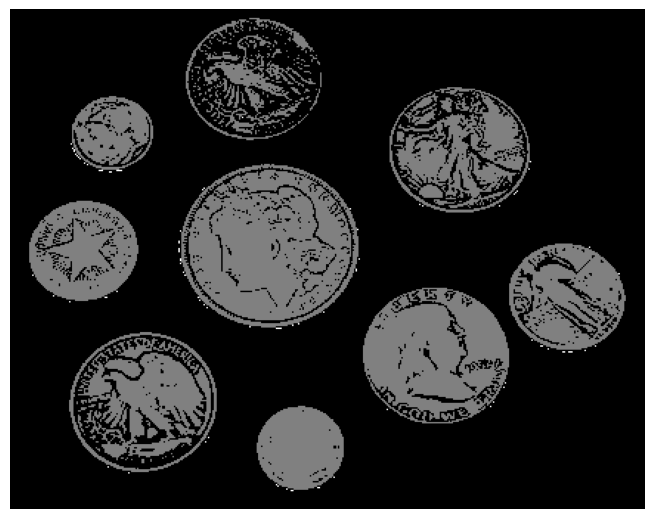

In [ ]:
edges = sobel(gray_c1)
markers = np.zeros_like(gray_c1)
foreground, background = 1, 2
markers[gray_c1 < 1.0] = background
markers[gray_c1 > 100.0] = foreground
show_gray(markers)

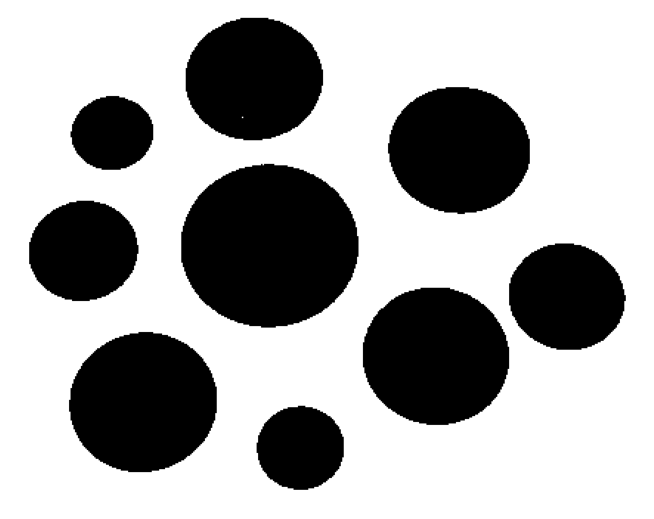

In [ ]:
ws = watershed(edges, markers)
show_gray(ws)

In [ ]:
seg1 = label(ws == foreground)

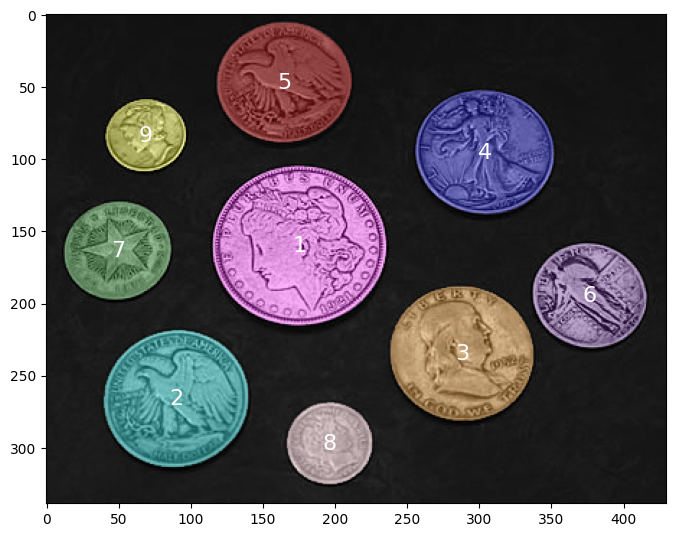

In [ ]:
color1 = label2rgb(seg1[0], image=gray_c1, bg_label=0)

regions = regionprops(seg1[0])
regions = sorted(regions, key=lambda r: r.area, reverse=True)

# Draw the labeled regions and annotate them with their index
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(color1)

for i, region in enumerate(regions):
    center = region.centroid
    # Annotate the region with its index
    ax.text(center[1], center[0], str(i+1), color='white', fontsize=16, ha='center', va='center')

plt.show()

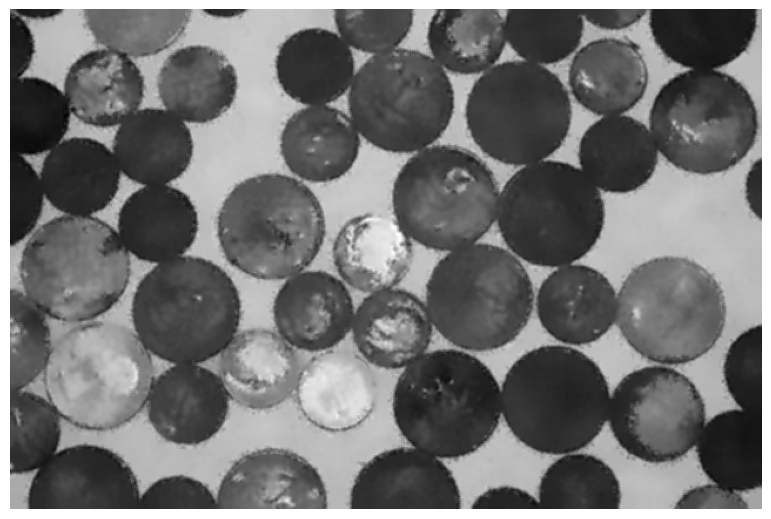

In [ ]:
filtered = cv2.pyrMeanShiftFiltering(coins_2, 10, 50)
filtered = cv2.GaussianBlur(filtered, (3, 3), 7)
gray_c2 = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)
#gray_c2 = 255 - gray_c2
show_gray(gray_c2)

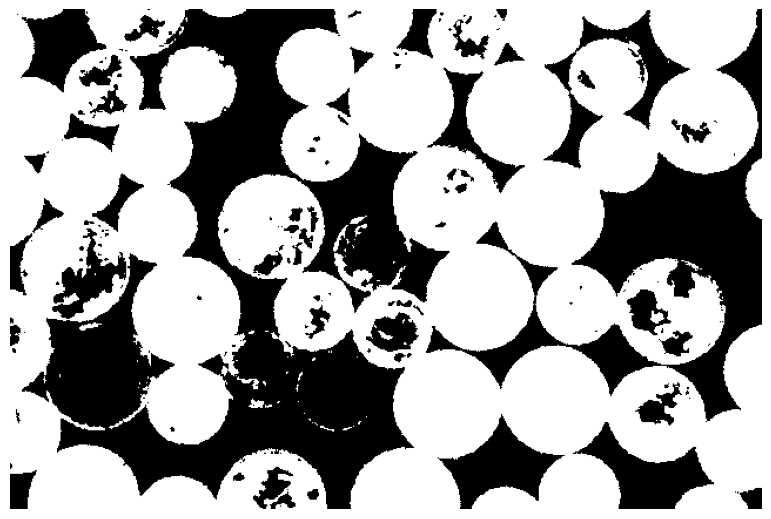

In [ ]:
_, gray_c2 = cv2.threshold(gray_c2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show_gray(gray_c2)

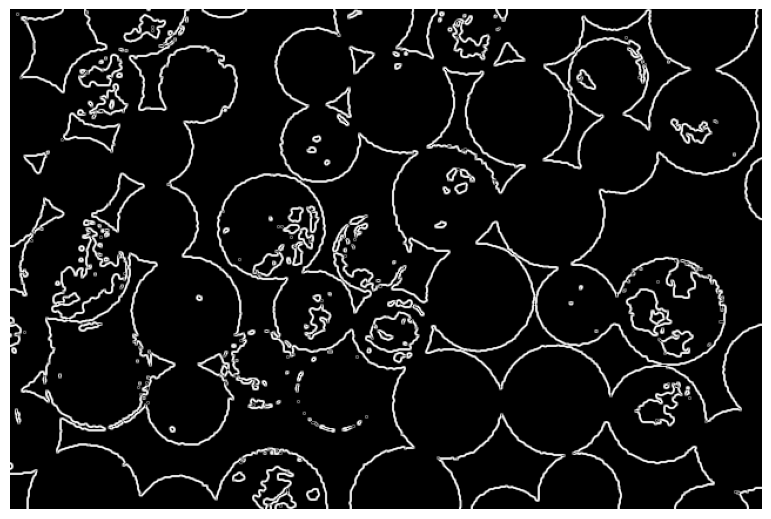

In [ ]:
edges2 = sobel(gray_c2)
show_gray(edges2)

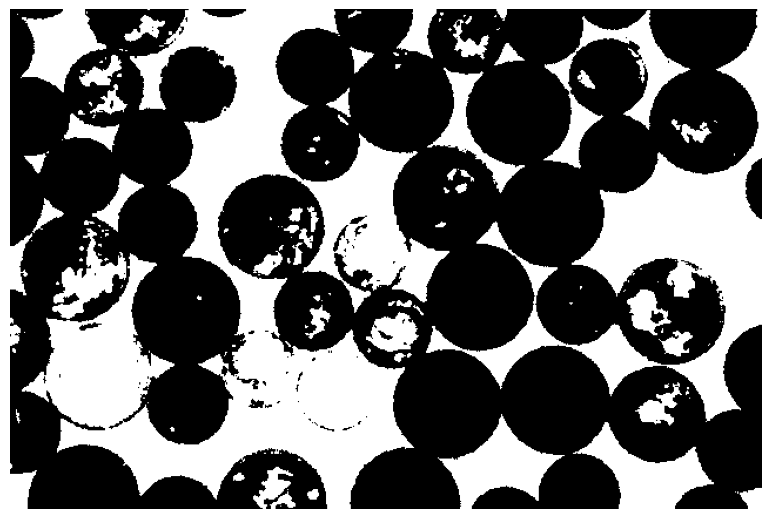

In [ ]:
markers2 = np.zeros_like(gray_c2)
foreground, background = 1, 2
markers2[gray_c2 < 120.0] = background
markers2[gray_c2 > 170.0] = foreground

ws2 = watershed(edges2, markers2)
show_gray(ws2)

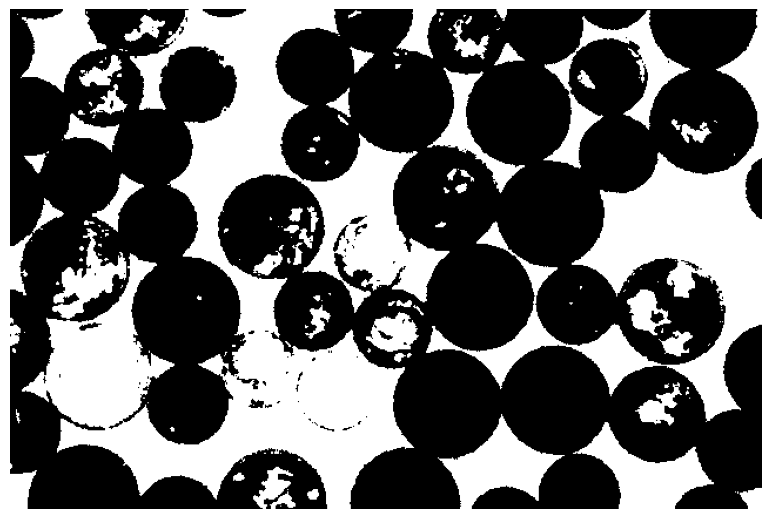

In [ ]:
ws2_8 = ws2.astype('uint8')
show_gray(ws2_8)

In [ ]:
x = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

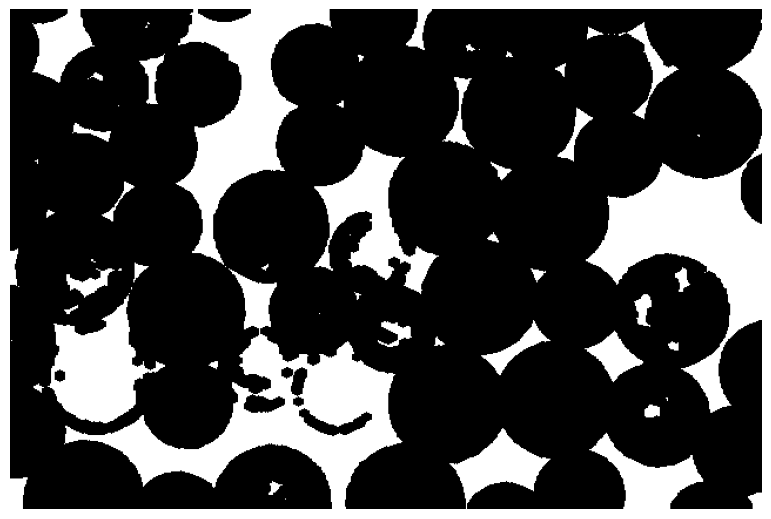

In [ ]:
q = cv2.erode(ws2_8, x, iterations=2)
show_gray(q)

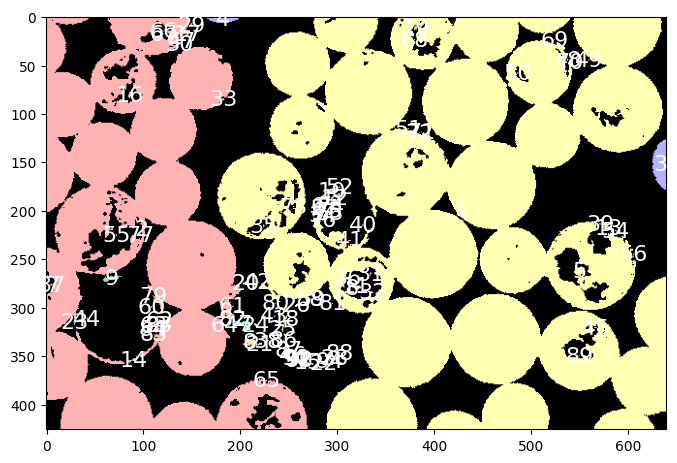

In [ ]:
seg2 = label(ws2_8 == foreground)

color2 = label2rgb(seg2[0], image=gray_c2, bg_label=0)

regions2 = regionprops(seg2[0])
regions2 = sorted(regions2, key=lambda r: r.area, reverse=True)

# Draw the labeled regions and annotate them with their index
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(color2)

for i, region in enumerate(regions2):
    center = region.centroid
    # Annotate the region with its index
    ax.text(center[1], center[0], str(i+1), color='white', fontsize=16, ha='center', va='center')


# Фильтры габора

**4. (15 баллов)**  

Реализуйте функцию, которая построит банк фильтров Габора по входящим аргументам n, m.
* n – число различных частот в дипазоне (0; max_freq]
* m - число различных напралений в диапазоне [0; Pi)

Продемонструйте, что предложенные фильтры более-менее плотно заполняют частотное просранство. Для этого переведите все фильтры в частотное пространство и отобразите все их одновременно на одной картинке.

Реализуйте интерактивное demo в котром будут два слайдера, один отвечает за разные разные частоы, другой за разные направления. Выведите 3 изображения:
* Вид фильтра в пространстве изображений
* Вид Фильтра в частотном пространстве
* Результат применения фильтра к $lena.jpg$

In [ ]:
def build_gabor_filter_bank(n, m, max_freq):
    filters = []
    for freq in np.linspace(0.01, max_freq, n):
        for theta in np.linspace(0, np.pi, m, endpoint=False):
            kernel = cv2.getGaborKernel((21, 21), 3, theta, freq, 1, 0, ktype=cv2.CV_32F)
            filters.append(kernel)
    return filters

In [ ]:
img = cv2.imread(str(sources_path / "lena.png"), cv2.IMREAD_GRAYSCALE)

In [ ]:
n = 5
m = 8
max_freq = 0.5
filters = build_gabor_filter_bank(n, m, max_freq)

fft_filters = [np.fft.fft2(kernel) for kernel in filters]

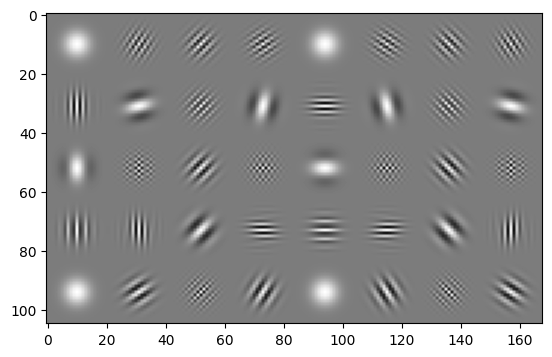

In [ ]:
canvas = np.zeros((21 * n, 21 * m))
for i in range(n):
    for j in range(m):
        canvas[i * 21: (i + 1) * 21, j * 21: (j + 1) * 21] = np.real(filters[i * m + j])
plt.imshow(canvas, cmap='gray')
plt.show()

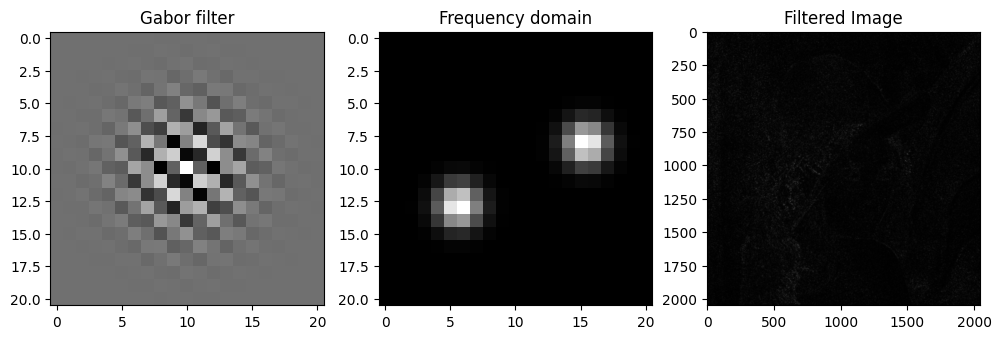

In [ ]:
filter_idx = 5
filtered_img = cv2.filter2D(img, -1, filters[filter_idx])
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(filters[filter_idx], cmap='gray')
axs[0].set_title('Gabor filter')
axs[1].imshow(np.abs(fft_filters[filter_idx]), cmap='gray')
axs[1].set_title('Frequency domain')
axs[2].imshow(filtered_img, cmap='gray')
axs[2].set_title('Filtered Image')
plt.show()

In [ ]:
from ipywidgets import interact, IntSlider, FloatSlider

freq_slider = FloatSlider(min=0.01, max=1.0, step=0.01, value=0.2, description='Frequency')
theta_slider = IntSlider(min=0, max=7, step=1, value=0, description='Direction')

def apply_filter(freq, theta):
    filter_idx = int(freq / max_freq * n) * m + theta
    filtered_img = cv2.filter2D(img, -1, filters[filter_idx])

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(filters[filter_idx], cmap='gray')
    axs[0].set_title('Gabor filter')
    axs[1].imshow(np.abs(fft_filters[filter_idx]), cmap='gray')
    axs[1].set_title('Frequency domain')
    axs[2].imshow(filtered_img, cmap='gray')
    axs[2].set_title('Filtered Image')
    plt.show()

interact(apply_filter, freq=freq_slider, theta=theta_slider);


interactive(children=(FloatSlider(value=0.2, description='Frequency', max=1.0, min=0.01, step=0.01), IntSlider…

# Цветовые гистрограммы.

**5. (15 баллов)**

Надо реализовать функцию, которая принимет на вход:

* список дескрипторов (**id**, и сам дескриптор)
* количество максимально похожих для вывода **n**
* функцию сранения дескрипторов

и отдает **n** пар **id** максимально похожих изображений.

Посмотрите на изображения в папке *Corel* (https://drive.google.com/drive/folders/1VbLDcmDye9wqZhnS7gg5i7Rxh2Vm_73F?usp=share_link). Посчитайте гистограммы изображений. Выведите на экран 20 пар изображений с максимально похожими гистограммами, которые получаются для лучшей комбинации. В этом задании надо попробовать:
* различные цветовые пространства (RGB, HSV, CIELab)
* различные способы разбиения на бины (разное количество для каждой характеристики, joint_vs_marginal)
* различные метрики сравнения $L_2$, $\chi^2$, пересечение гистограм

Постройте сводную таблицу-отчет в которою впишите, сколько похожих пар получилось для каждого эксперимента. Проведите не менее 8 экспериментов и напишите какие-нибудь выводы

In [ ]:
import os

folder_path = "/content/drive/MyDrive/3img/Corel"

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)] #if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

# Add the image files to the "images" list
images = []
for image_file in image_files:
  x = cv2.imread(image_file)#, cv2.IMREAD_GRAYSCALE)
  images.append(x)



In [ ]:
# hist = cv2.calcHist([images[0]],[0],None,[256],[0,256])
# plt.plot(hist, color='b')

In [ ]:
# hist = cv2.calcHist([images[0]], [0, 1, 2], None, [256,256,256], [0, 256, 0, 256, 0, 256])
# plt.plot(hist[1], color='b')

In [ ]:
import numpy as np
import cv2
from itertools import combinations
from typing import List, Tuple

def compare_hists(hist1, hist2, method):
  e = 0
  for i in range(3):
    e += cv2.compareHist(hist1[:,i], hist2[:,i], method)
  return e


def calc_hist(img, color_space, bins=256):
  img = cv2.cvtColor(img, color_space)
  hist = np.zeros((256, 3), dtype=np.float32) #!!!!!!
  hist_channel = [cv2.calcHist([img], [i], None, [bins], [0, 256]) for i in range(3)]
  hist_ch_norm = [cv2.normalize(h, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX) for h in hist_channel]

  for i in range(3):
    hist[:,i] = hist_ch_norm[i].flatten()

  return hist


def count_pairwise_hist(images, method, color_space):
  idx_pairs = []
  hist_pairs = []
  e = []

  for i in range(len(images)):
    for j in range(i+1, len(images)):
      h1 = calc_hist(images[i], color_space)
      h2 = calc_hist(images[j], color_space)

      comp = compare_hists(h1, h2, method)

      idx_pairs.append((i,j))
      hist_pairs.append((h1, h2))
      e.append(comp)

  return np.array(idx_pairs), np.array(hist_pairs), np.array(e)


def get_similar(idx_pairs, hist_pairs, e, n_sim=20):
  idx = np.argsort(-e)[:n_sim]

  return idx_pairs[idx], hist_pairs[idx]
  #, e[idx]

In [ ]:
def show_sim(img1, img2, hist1, hist2):
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

  ax[0].imshow(img1)
  ax[1].imshow(img2)

  colors = ['b', 'g', 'r']
  for i in range(3):
      ax[2].fill_between(np.arange(hist1.shape[0]), 0, hist1[:, i], color=colors[i], alpha=0.1)
      ax[2].fill_between(np.arange(hist2.shape[0]), 0, hist2[:, i], color=colors[i], alpha=0.1)

  plt.show()

In [ ]:
def sol(images, method, color_space):
  idx_pairs, hist_pairs, e = count_pairwise_hist(images, method, color_space)
  idx_pairs, hist_pairs = get_similar(idx_pairs, hist_pairs, e)

  for i in range(len(idx_pairs)):
    show_sim(images[idx_pairs[i][0]], images[idx_pairs[i][1]], hist_pairs[i][0], hist_pairs[i][1])

In [ ]:
sol(images, cv2.HISTCMP_INTERSECT, cv2.COLOR_BGR2RGB)

In [ ]:
sol(images, cv2.HISTCMP_INTERSECT, cv2.COLOR_BGR2HSV)

In [ ]:
sol(images, cv2.HISTCMP_INTERSECT, cv2.COLOR_BGR2LAB)

In [ ]:
sol(images, cv2.HISTCMP_CHISQR, cv2.COLOR_BGR2RGB)

In [ ]:
sol(images, cv2.HISTCMP_CHISQR, cv2.COLOR_BGR2HSV)

In [ ]:
sol(images, cv2.HISTCMP_CHISQR, cv2.COLOR_BGR2LAB)

In [ ]:
sol(images, cv2.HISTCMP_CORREL, cv2.COLOR_BGR2RGB)

In [ ]:
sol(images, cv2.HISTCMP_CORREL, cv2.COLOR_BGR2HSV)

In [ ]:
sol(images, cv2.HISTCMP_CORREL, cv2.COLOR_BGR2LAB)

# Гистограмма градиентов

|           | INTERSECT |    Chi2    |     L2    |
|-----------|-----------|------------|-----------|
|    RGB    |   5/20    |    0/20    |   16/20   |
|    HSV    |   6/20    |    0/20    |   19/20   |
|    LAB    |   6/20    |    0/20    |   19/20   |

# CORREL - абсолютный чемпион
# Chi2 - сработал не очень
# INTERSECT - вообще не сработал

## при этом методы, которые отработали, показывают лучшие результаты не в RGB

**6. (10 баллов)**

Реализуйте функцию вычисления $HOG$ дескриптора для изображения, которая принимает на вход размер сетки. Визуализируйте полученный дескриптор на изображении *susi_example.jpg* с сетками размером 10x8 и 5x4. Просканируйте скользящим окном изображение *susi_gallery.jpg* и подсветите все области, дексриптор которых поход на дескриптор *susi_example.jpg*. В идеальном случае мы должны получить 3 изображения, для которых надо подобрать порог похожести:
* Та самая вырезанная сушина.
* Все суши с креветкой.
* Все суши, которые визуально похожи на суши с креветкой.

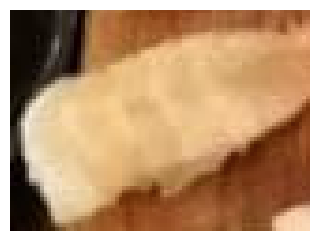

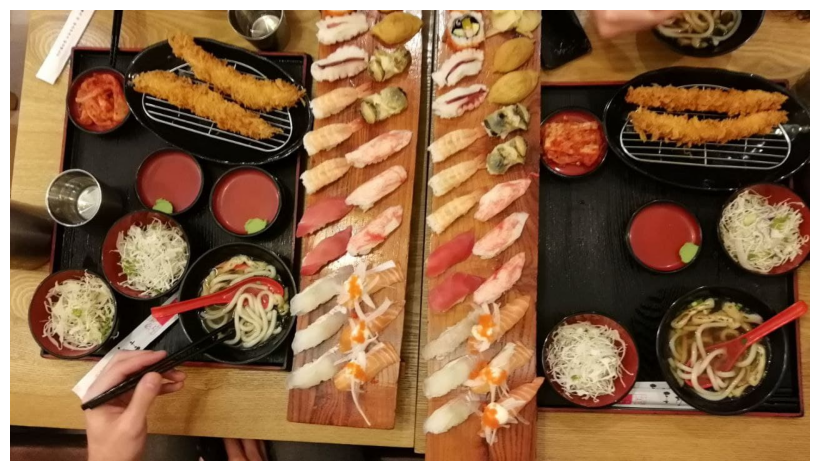

In [ ]:
susi_example = cv2.imread(str(sources_path / "susi_example.jpg"))
show_bgr(susi_example, size=(3, 4))
susi_gallery = cv2.imread(str(sources_path / "susi_gallery.jpg"))
show_bgr(susi_gallery, size=(8, 16))

In [ ]:
import math

In [ ]:
def HOG(img, cell_size=(8,8), n_bins=9):
  img = img.astype('uint8')
  G_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  G_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

  img = cv2.GaussianBlur(img, (3, 3), 0)
  x_grad = cv2.filter2D(img, -1, G_x)
  y_grad = cv2.filter2D(img, -1, G_y)

  magnitude = np.sqrt(x_grad**2 + y_grad**2)
  angle = np.degrees(np.arctan2(y_grad, x_grad))
  #return magnitude, angle

  step = 180 / n_bins

In [ ]:
gray_s = cv2.cvtColor(susi_example, cv2.COLOR_BGR2GRAY)

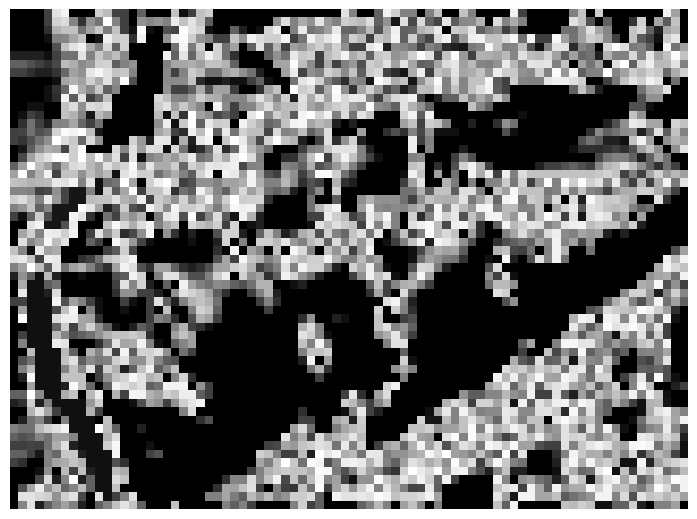

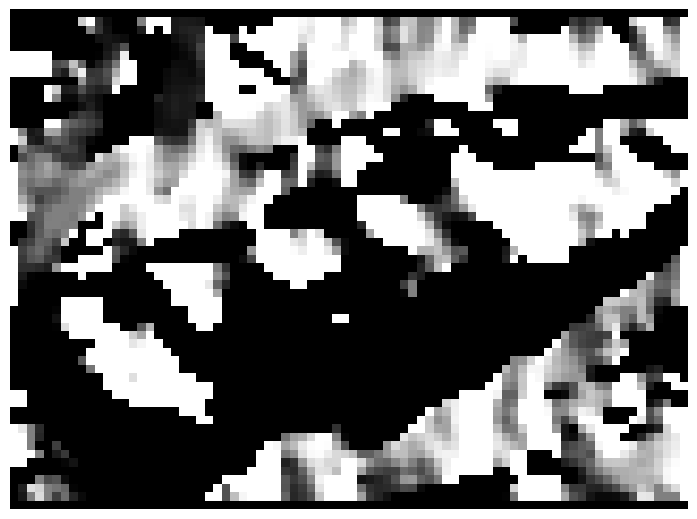

In [ ]:
x,y = HOG(gray_s)
show_gray(x)
show_gray(y)